# Density-Based Clustering

## Objetivo

*   Aprender a usar o algoritmo do DBSCAN do Scikit-learn


In [7]:
import numpy as np 
import pandas as pd
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

np.random.seed(42)

In [8]:
df = pd.read_excel("https://github.com/EduPekUfpr/PPGOLD7037/raw/main/Data/Cluster01.xlsx")
ss = StandardScaler()
df_norm = pd.DataFrame(ss.fit_transform(df),columns = df.columns)
df_norm.head()

,X,Y
0,-0.010699,0.309233
1,0.371370,0.174692
2,1.954889,-0.008204
3,1.243016,0.277546
4,0.037111,1.293020


## DBSCAN
Nós Usaremos 2 parâmetros para o DBSCAN:

* Epsilon - Medida do Raio
* minimumSamples - quantos Vizinhos por raio



In [9]:
epsilon = 0.2
minimumSamples = 10

db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(df_norm)

labels = db.labels_
df_cluster = df_norm.copy()
df_cluster["cluster"] = labels
UniqueLabels = df_cluster["cluster"].unique()

UniqueLabels

array([ 0,  1,  3,  2, -1])

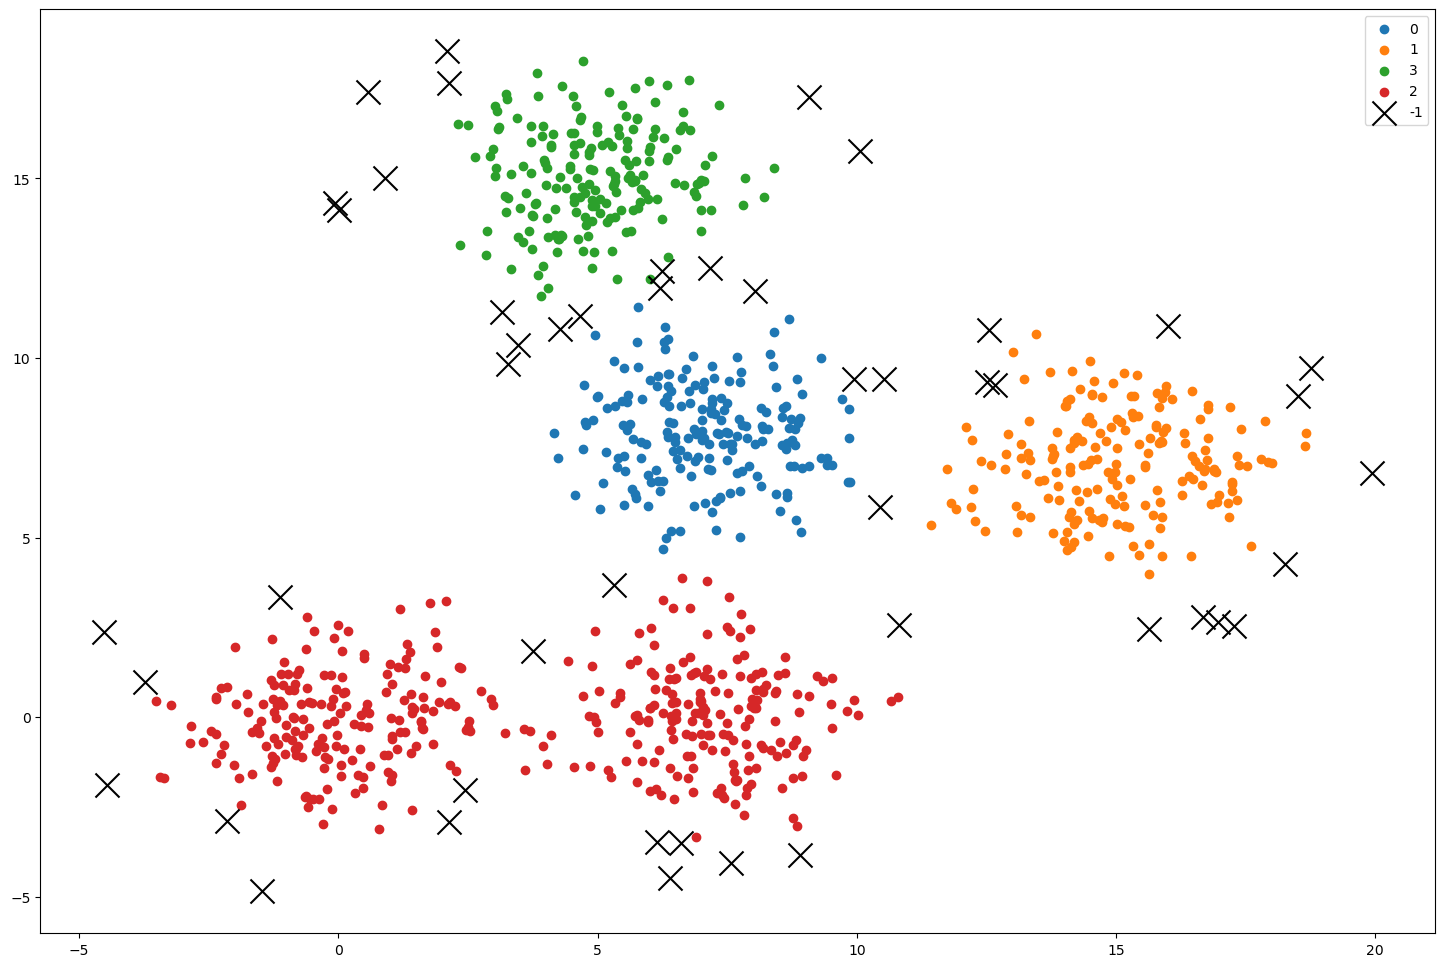

In [10]:
plt.figure(figsize=(18, 12))
for i in UniqueLabels:
    if i != -1:
        plt.scatter(df.loc[df_cluster['cluster'] == i, ['X']] , df.loc[df_cluster['cluster'] == i, ['Y']] , label = i)
    else: # Print OUTLIERS
        #plt.scatter(X[labels == i , 0] , X[labels == i , 1] , label = i, marker="x", s=300, color = 'k')
        plt.scatter(df.loc[df_cluster['cluster'] == i, ['X']] , df.loc[df_cluster['cluster'] == i, ['Y']] , label = i, marker="x", s=300, color = 'k')

plt.legend()
plt.show()